In [6]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("abdulwadood11220/netflix-customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rshew\.cache\kagglehub\datasets\abdulwadood11220\netflix-customer-churn-dataset\versions\1


In [7]:
import os
# List files in the downloaded dataset directory
files = os.listdir(path)
files


['netflix_customer_churn.csv']

In [ ]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
# Load the dataset
df = pd.read_csv(os.path.join(path, 'netflix_customer_churn.csv'))
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [75]:
# Check the data types and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [74]:
# Check for missing values

df.isnull().sum().sort_values(ascending=False)

customer_id               0
age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
region                    0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [73]:
# Selecting numeric columns for clustering

numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns

Index(['age', 'watch_hours', 'last_login_days', 'monthly_fee', 'churned',
       'number_of_profiles', 'avg_watch_time_per_day'],
      dtype='object')

In [12]:
df.shape

(5000, 14)

In [76]:
# describe the dataset

df.describe()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,0.503000,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,0.500041,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,0.000000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,0.000000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,1.000000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,1.000000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,1.000000,5.000000,98.420000


In [14]:
df.describe(include='object')

,customer_id,gender,subscription_type,region,device,payment_method,favorite_genre
count,5000,5000,5000,5000,5000,5000,5000
unique,5000,3,3,6,5,5,7
top,82aeef39-ddb0-40ad-bae1-5c436e0cf042,Female,Premium,South America,Tablet,Debit Card,Drama
freq,1,1711,1693,873,1048,1030,731


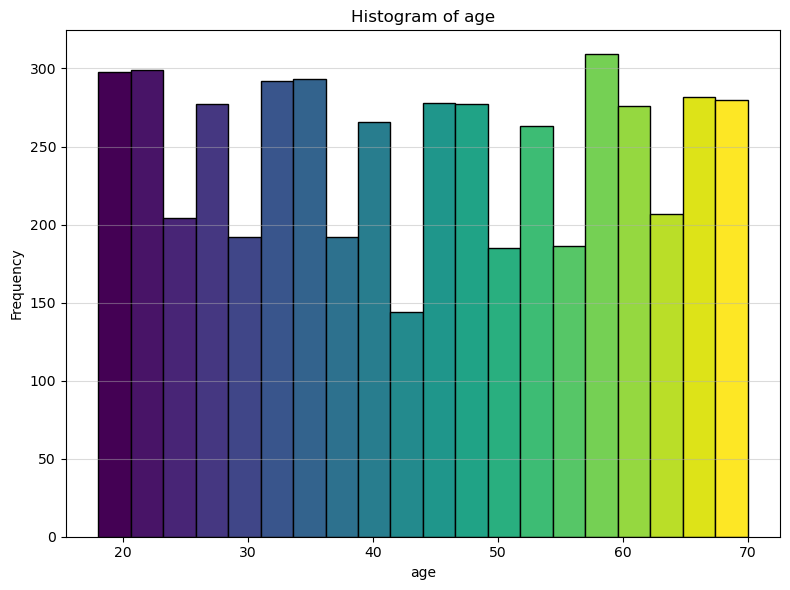

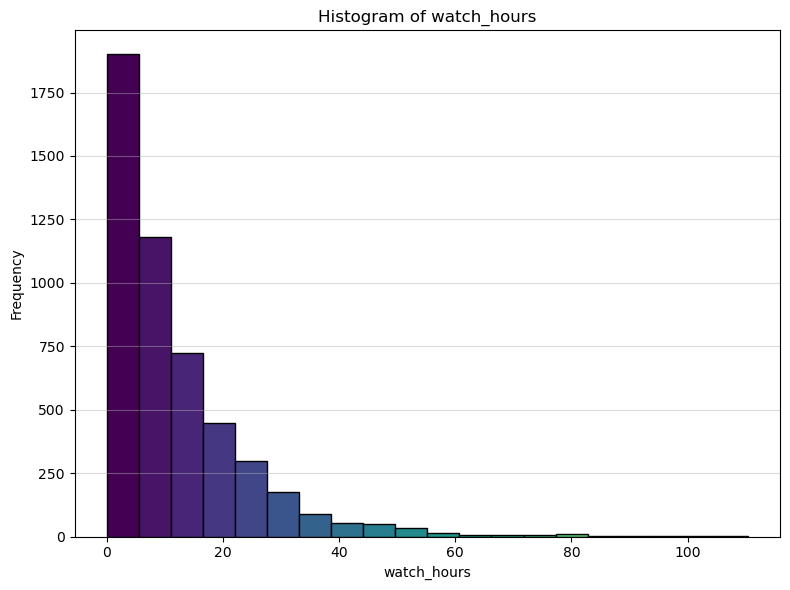

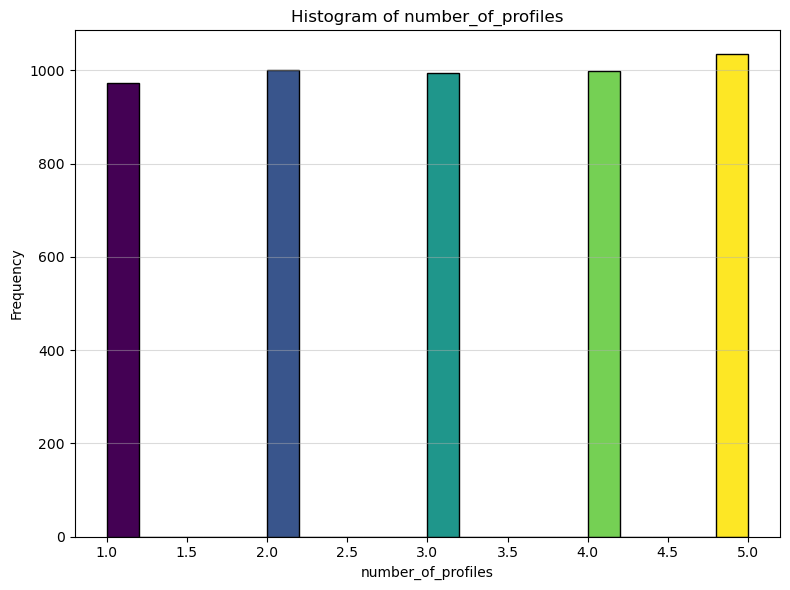

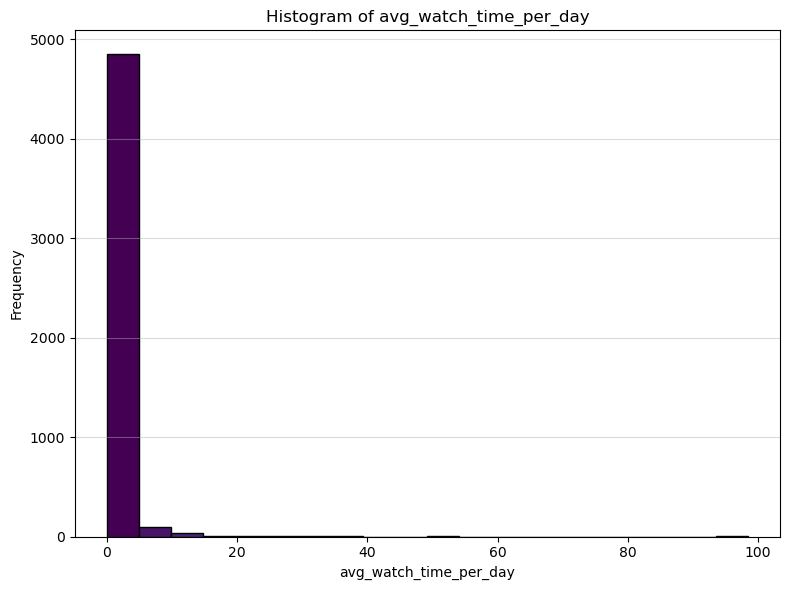

In [72]:
# Plotting a histogram of a numeric column

import matplotlib.pyplot as plot


num_columns = ['age', 'watch_hours', 'number_of_profiles','avg_watch_time_per_day']


for col in num_columns:
    plot.figure(figsize=(8,6))
    
    data = df[col].dropna()
    
    n, bins, patches = plot.hist(data, bins=20, edgecolor='black')
    cmap = plot.cm.get_cmap('viridis', len(patches))
    
    
    for i, patch in enumerate(patches):
        patch.set_facecolor(cmap(i))
    
    plot.title(f'Histogram of {col}')
    plot.xlabel(col)
    plot.ylabel('Frequency')
    plot.grid(axis='y', alpha=0.45)
    plot.tight_layout()
    plot.show()
    

In [ ]:
# preprocessing the data for clustering

from sklearn.preprocessing import StandardScaler

scalar = StandardScaler()
scaled_data = scalar.fit_transform(df[numeric_columns])

In [63]:
scaled_data

array([[ 0.46147063,  0.25642504, -0.06215238, ...,  0.99401789,
        -1.42996464, -0.14689477],
       [ 0.20339909, -0.91143244, -0.63246235, ...,  0.99401789,
         1.39549404, -0.32249662],
       [-1.08695864,  0.38877668, -1.14574131, ..., -1.00601811,
        -0.72359997,  0.23103096],
       ...,
       [ 1.42923893,  0.40792188,  1.07846755, ...,  0.99401789,
        -0.72359997, -0.20797367],
       [ 0.97761372, -0.21055147, -1.54495829, ..., -1.00601811,
         0.68912937,  0.53642549],
       [ 0.84857795, -0.83485162, -0.74652434, ...,  0.99401789,
        -0.72359997, -0.29959203]])

In [77]:
# Create a DataFrame with the scaled data
scaled_data_df = pd.DataFrame(scaled_data, columns=numeric_columns, index=df.index)

In [19]:
scaled_data_df

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
0,0.461471,0.256425,-0.062152,-1.271341,0.994018,-1.429965,-0.146895
1,0.203399,-0.911432,-0.632462,0.083051,0.994018,1.395494,-0.322497
2,-1.086959,0.388777,-1.145741,0.083051,-1.006018,-0.723600,0.231031
3,0.590506,-0.594288,-1.031679,1.166565,0.994018,-0.723600,-0.200339
4,0.784060,-0.812377,-0.974648,0.083051,0.994018,-0.723600,-0.284322
...,...,...,...,...,...,...,...
4995,-1.603102,3.123211,-1.088710,-1.271341,-1.006018,0.689129,1.231198
4996,1.493757,-0.200563,-1.601989,-1.271341,-1.006018,-0.017235,0.841820
4997,1.429239,0.407922,1.078468,0.083051,0.994018,-0.723600,-0.207974
4998,0.977614,-0.210551,-1.544958,-1.271341,-1.006018,0.689129,0.536425


In [ ]:
# Importing necessary libraries for clustering and visualization

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


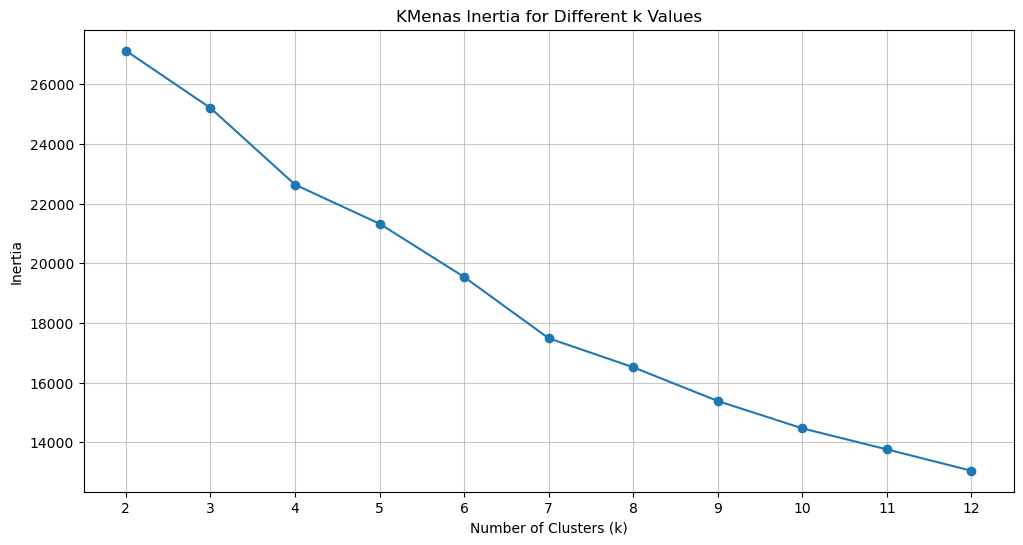

In [85]:
#KMeans clustering to find the optimal number of clusters using the elbow method

max_k = 12

inertia = []

k_values = range(2, max_k + 1)
                 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    kmeans.fit_predict(scaled_data_df)
    inertia.append(kmeans.inertia_)

             
plt.figure(figsize=(12, 6))
plt.plot(k_values, inertia, marker='o')

plt.title('KMenas Inertia for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')

plt.xticks(k_values)
plt.grid(True, alpha=0.7)
plt.show()            

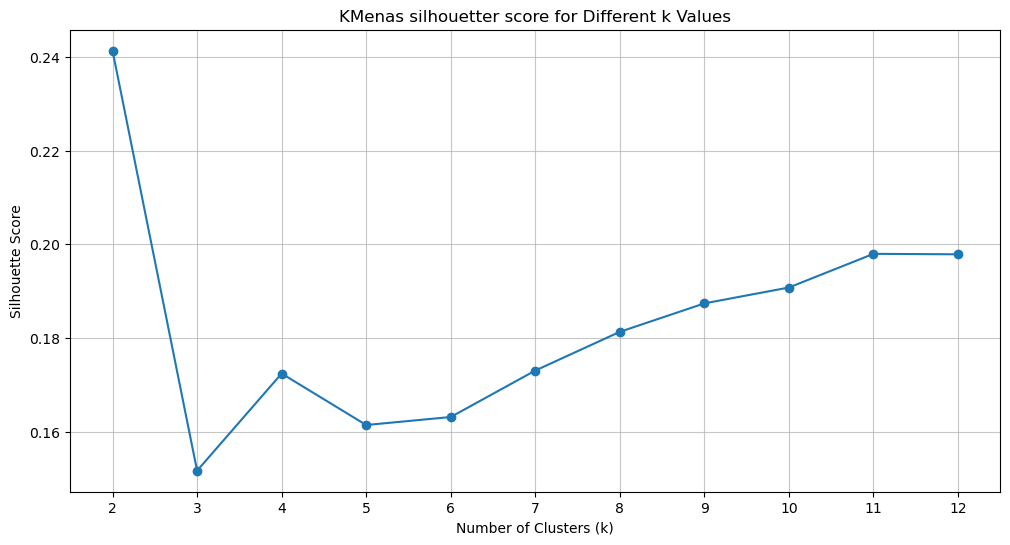

In [150]:
# Calculating silhouette scores for different k values to find the optimal number of clusters

from sklearn.metrics import silhouette_score


max_k = 12

silhouette_scores = []

k_values = range(2, max_k + 1)
                 
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels= kmeans.fit_predict(scaled_data_df)
    score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(score)
    

plt.figure(figsize=(12, 6))
plt.plot(k_values, silhouette_scores, marker='o')

plt.title('KMenas silhouetter score for Different k Values')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')


plt.xticks(k_values)
plt.grid(True, alpha=0.7)
plt.show()            

In [178]:
# checking the silhouette score for the optimal number of clusters

score = silhouette_score(scaled_data_df, cluster_labels)
print(f'Silhouette Score: {score:.4f}')


Silhouette Score: 0.1979


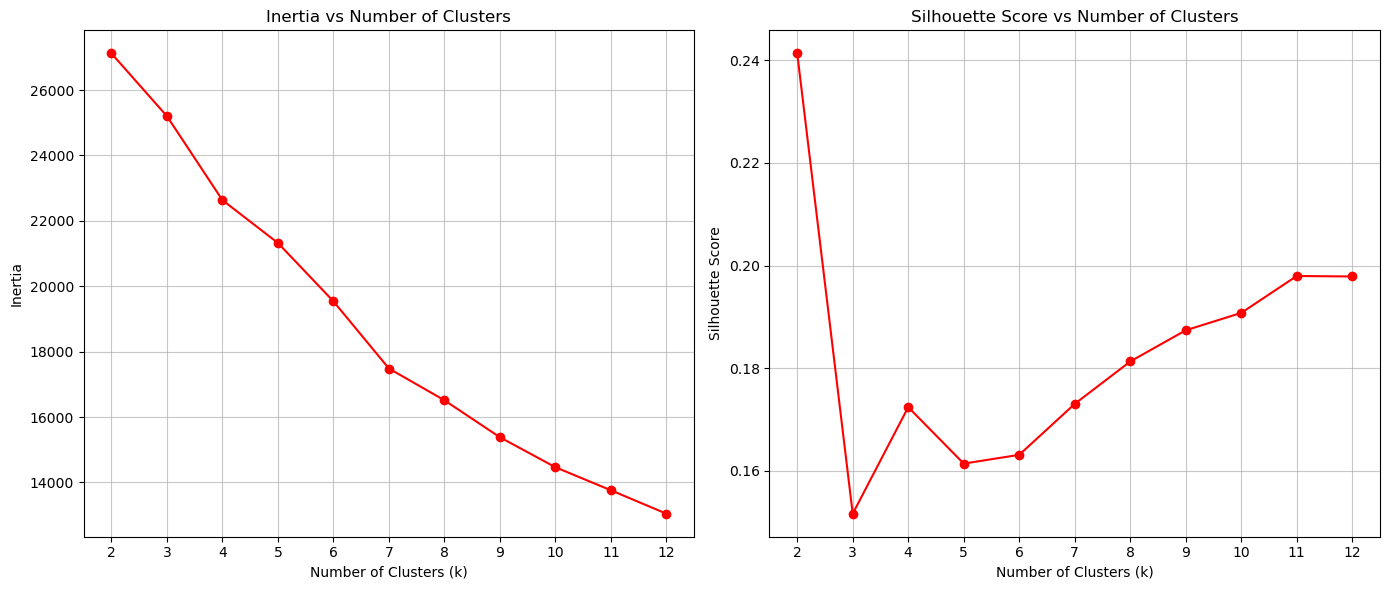

In [179]:
# Plotting inertia and silhouette scores for different k values

plt.figure(figsize =(14,6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, color="red",marker='o')
plt.title('Inertia vs Number of Clusters')
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True, alpha=0.7)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhouette_scores,color="red", marker='o')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True, alpha=0.7)
plt.tight_layout()  
plt.show()

In [180]:
# cluster labels assignment to the scaled data df
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=1000)
cluster_labels = kmeans.fit_predict(scaled_data_df) 

cluster_labels

array([2, 2, 1, ..., 2, 1, 2], dtype=int32)

In [193]:
k_df = df.copy()
k_df['Cluster'] = cluster_labels

In [194]:
# orginal data without cluster labels
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action


In [182]:
# cluster labels added to the copy of original data
k_df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,Cluster
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,2
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,2
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,Asia,TV,13.99,0,Crypto,2,1.48,Drama,1
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,Oceania,TV,17.99,1,Crypto,2,0.35,Horror,2
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Africa,Mobile,13.99,1,Crypto,2,0.13,Action,2


In [183]:
# value counts of clusters in the dataset

k_df['Cluster'].value_counts().sort_index()

Cluster
0    1240
1    2461
2    1299
Name: count, dtype: int64

In [197]:
cluster_df = scaled_data_df.copy()
cluster_df['Cluster'] = cluster_labels

In [195]:
scaled_data_df.head()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day
0,0.461471,0.256425,-0.062152,-1.271341,0.994018,-1.429965,-0.146895
1,0.203399,-0.911432,-0.632462,0.083051,0.994018,1.395494,-0.322497
2,-1.086959,0.388777,-1.145741,0.083051,-1.006018,-0.723600,0.231031
3,0.590506,-0.594288,-1.031679,1.166565,0.994018,-0.723600,-0.200339
4,0.784060,-0.812377,-0.974648,0.083051,0.994018,-0.723600,-0.284322


In [198]:
cluster_df.head()

,age,watch_hours,last_login_days,monthly_fee,churned,number_of_profiles,avg_watch_time_per_day,Cluster
0,0.461471,0.256425,-0.062152,-1.271341,0.994018,-1.429965,-0.146895,2
1,0.203399,-0.911432,-0.632462,0.083051,0.994018,1.395494,-0.322497,2
2,-1.086959,0.388777,-1.145741,0.083051,-1.006018,-0.723600,0.231031,1
3,0.590506,-0.594288,-1.031679,1.166565,0.994018,-0.723600,-0.200339,2
4,0.784060,-0.812377,-0.974648,0.083051,0.994018,-0.723600,-0.284322,2


In [200]:
cluster_df['Cluster'].value_counts().sort_index()

Cluster
0    1240
1    2461
2    1299
Name: count, dtype: int64

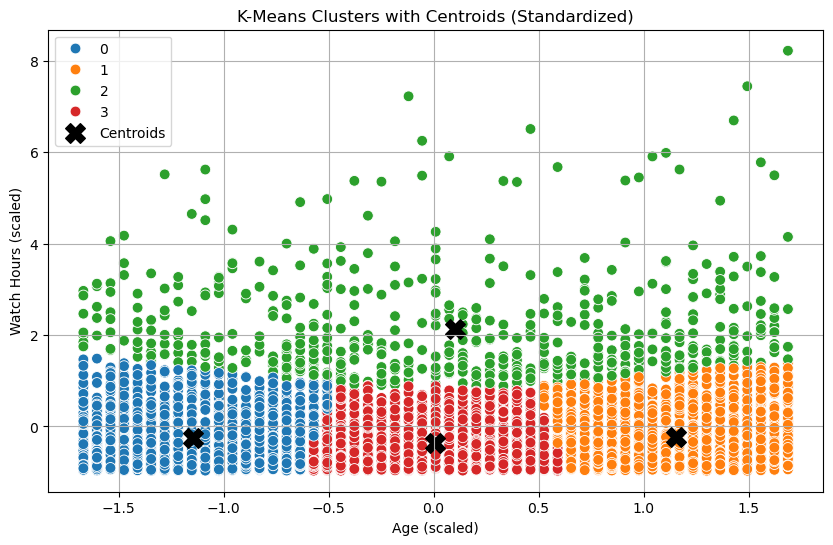

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the two features
X_scaled = scaled_data_df[['age', 'watch_hours']].values

# Standardize them
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Fit KMeans again on just these 2 features
kmeans_2d = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_2d.fit_predict(X_scaled)
centroids = kmeans_2d.cluster_centers_

# Add clusters to DataFrame for plotting
df['Cluster_2D'] = clusters

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='tab10', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clusters with Centroids (Standardized)')
plt.xlabel('Age (scaled)')
plt.ylabel('Watch Hours (scaled)')
plt.legend()
plt.grid(True)
plt.show()


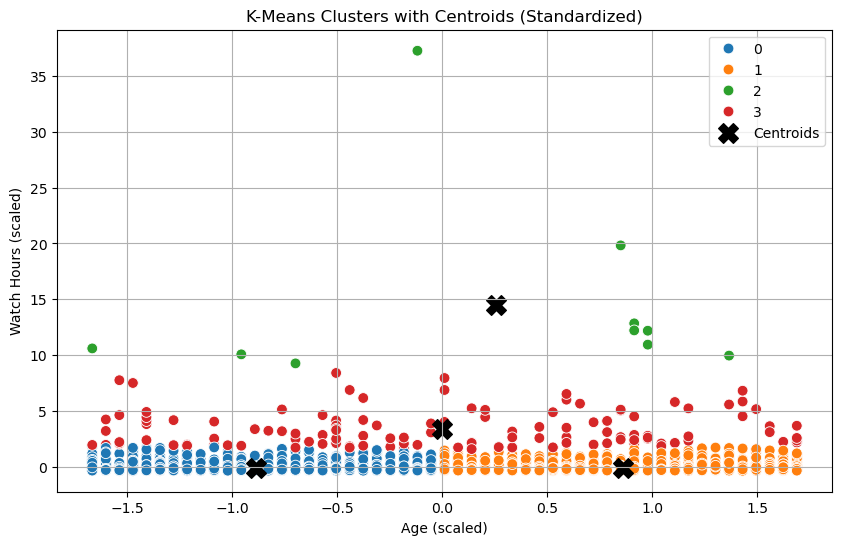

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only the two features
X_scaled = scaled_data_df[['age', 'avg_watch_time_per_day']].values

# Standardize them
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

# Fit KMeans again on just these 2 features
kmeans_2d = KMeans(n_clusters=4, random_state=42)
clusters = kmeans_2d.fit_predict(X_scaled)
centroids = kmeans_2d.cluster_centers_

# Add clusters to DataFrame for plotting
df['Cluster_2D'] = clusters

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=clusters, palette='tab10', s=60)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='X', s=200, label='Centroids')
plt.title('K-Means Clusters with Centroids (Standardized)')
plt.xlabel('Age (scaled)')
plt.ylabel('Watch Hours (scaled)')
plt.legend()
plt.grid(True)
plt.show()


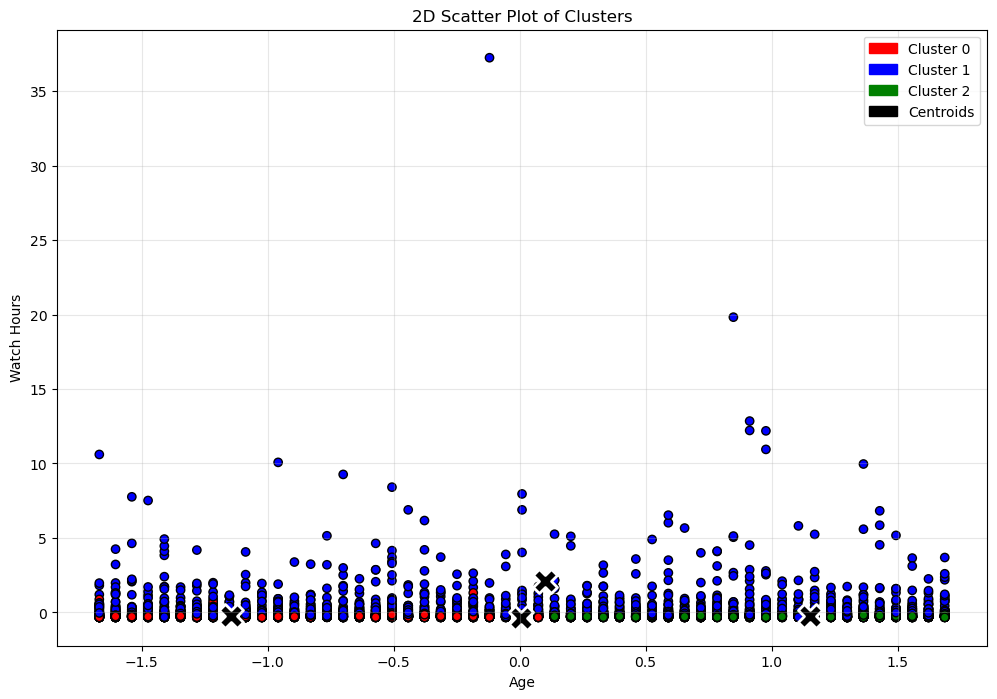

In [202]:
# 2d scatter plot of clusters

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Define colors for each cluster
cluster_colors = {
                   0: 'red',
                   1: 'blue',
                   2: 'green'
                  }

# Map colors to Cluster column
colors = cluster_df['Cluster'].map(cluster_colors)


plt.figure(figsize=(12, 8))
plt.scatter(cluster_df['age'], cluster_df['avg_watch_time_per_day'], c=colors, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Watch Hours')
plt.title('2D Scatter Plot of Clusters')

# plotting legen
legend_patches = [
                  mpatches.Patch(color='red', label='Cluster 0'),
                  mpatches.Patch(color='blue', label='Cluster 1'),
                  mpatches.Patch(color='green', label='Cluster 2'),
              ]

# Ploting centroids
centroid_patch = mpatches.Patch(color='black', label='Centroids')
all_patches = legend_patches + [centroid_patch]

plt.scatter(centroids[:, 0], centroids[:, 1], 
            s=300, c='black', marker='X', edgecolor='white', linewidths=2, label='Centroids')

plt.legend(handles=all_patches)


# Optional grid
plt.grid(True, alpha=0.3)
plt.show()


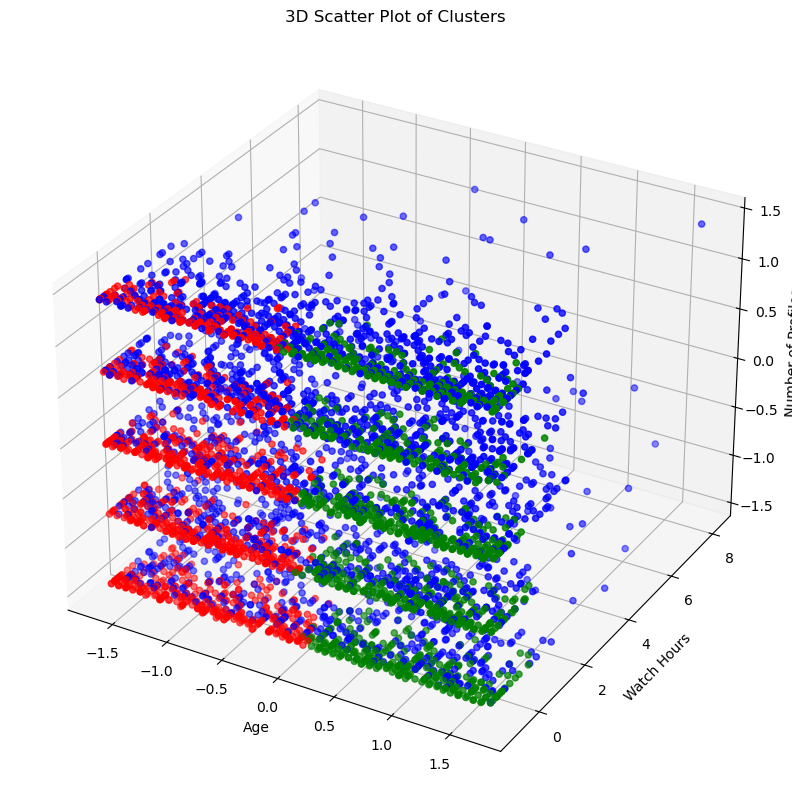

In [204]:
# 3d scatter plot of clusters

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

cluster_colors = {
    0: 'red',
    1: 'blue',
    2: 'green'
}

colors = cluster_df['Cluster'].map(cluster_colors)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(projection='3d')

sctter = ax.scatter(cluster_df['age'], cluster_df['watch_hours'],cluster_df['number_of_profiles'], c=colors, marker='o')

ax.set_xlabel('Age')
ax.set_ylabel('Watch Hours')
ax.set_zlabel('Number of Profiles')
plt.title('3D Scatter Plot of Clusters')

plt.show()

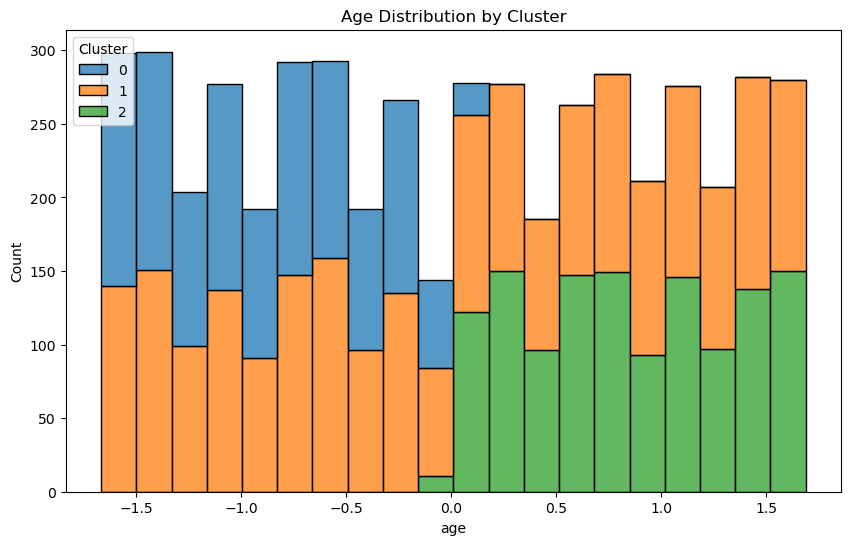

In [205]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.histplot(data=cluster_df, x='age', hue='Cluster', multiple='stack', palette='tab10', bins=20)
plt.title('Age Distribution by Cluster')
plt.show()


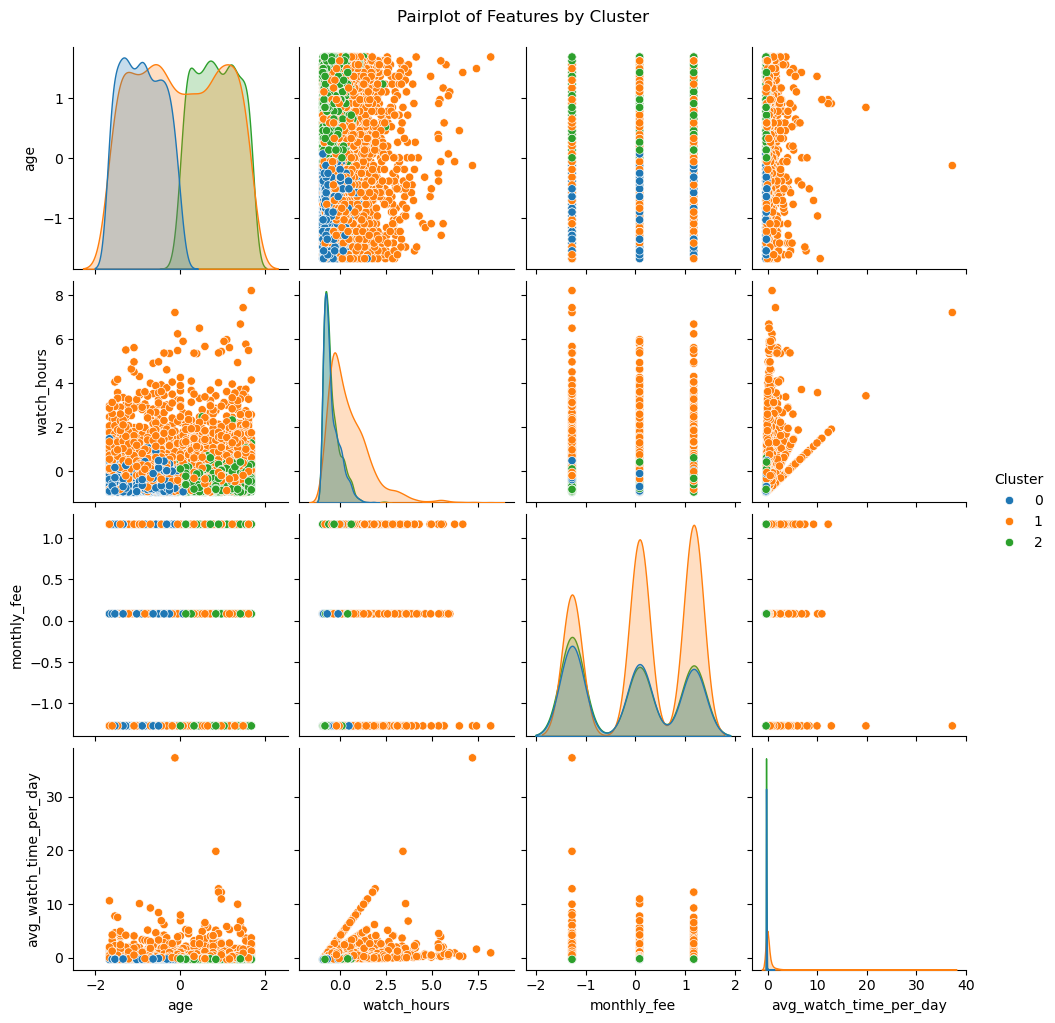

In [206]:
sns.pairplot(cluster_df[['age', 'watch_hours', 'monthly_fee', 'avg_watch_time_per_day', 'Cluster']], hue='Cluster', palette='tab10')
plt.suptitle("Pairplot of Features by Cluster", y=1.02)
plt.show()


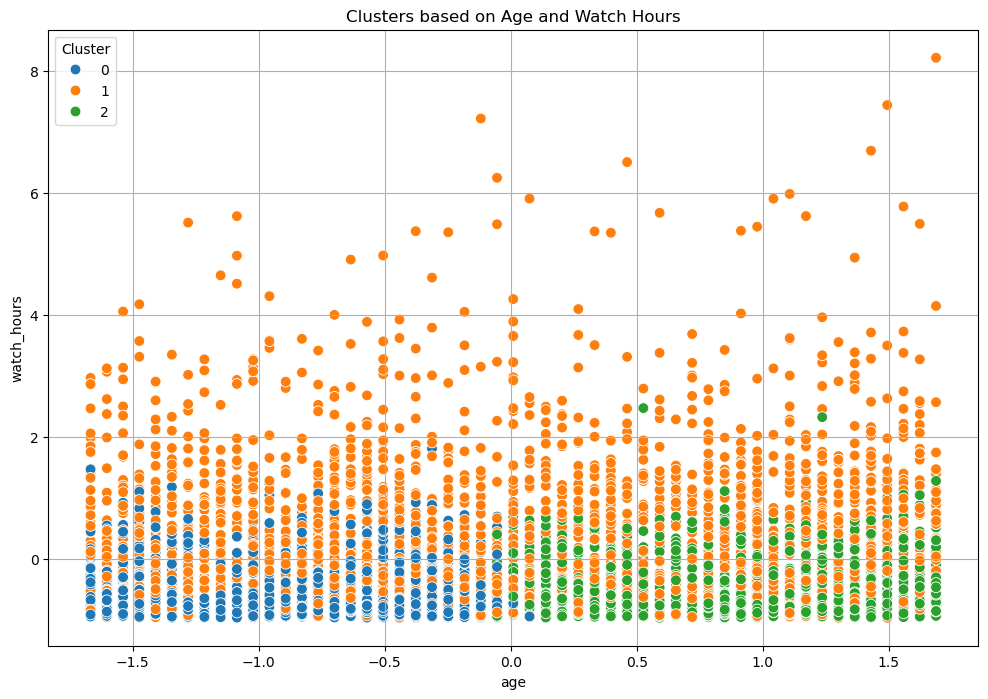

In [210]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cluster_df, x='age', y='watch_hours', hue='Cluster', palette='tab10', s=60)
plt.title('Clusters based on Age and Watch Hours')
plt.grid(True)
plt.show()


In [213]:
cluster_mean = cluster_df.groupby('Cluster')[['age', 'watch_hours', 'monthly_fee', 'last_login_days']].mean()
cluster_mean

,age,watch_hours,monthly_fee,last_login_days
Cluster,,,,
0,-0.891012,-0.482383,-0.132778,0.438939
1,-0.002607,0.490309,0.150633,-0.493025
2,0.855482,-0.468433,-0.158633,0.515050


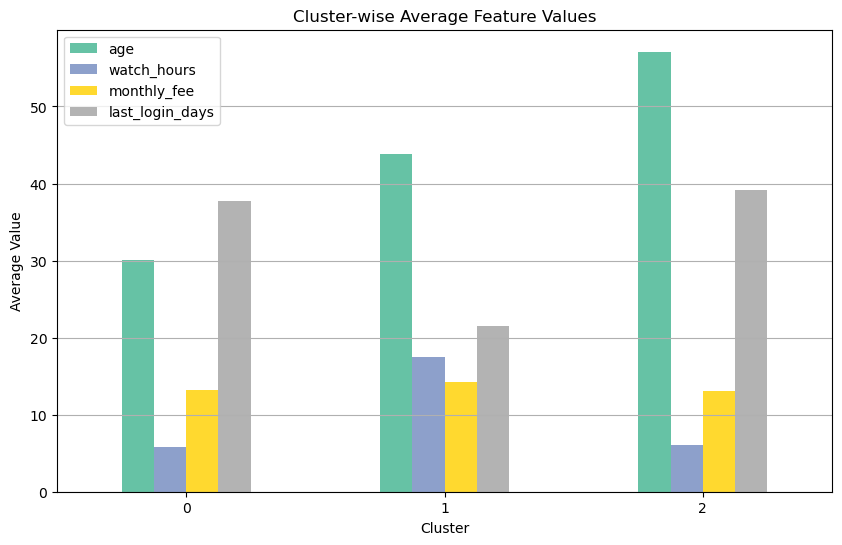

In [163]:
cluster_mean.plot(kind='bar', figsize=(10, 6), colormap='Set2')
plt.title("Cluster-wise Average Feature Values")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


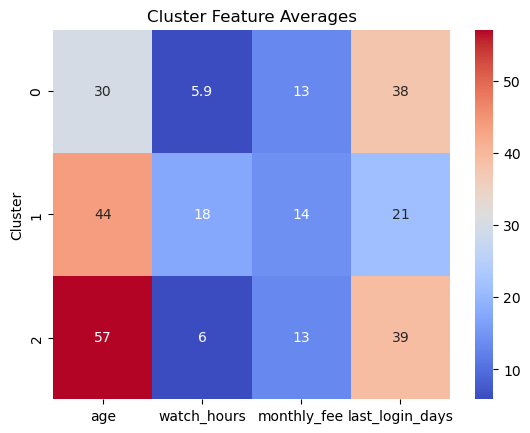

In [ ]:
sns.heatmap(cluster_mean, annot=True, cmap='coolwarm',)
plt.title("Cluster Feature Averages")
plt.show()
